First five rows of the dataset:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   

       Longitude    PRICE  
20046    -119.01  0.47700  
3024     -119.46  0.45800  
15663    -122.44  5.00001  
20484    -118.72  2.18600  
9814     -121.93  2.78000  

Linear Regression Mean Squared Error: 0.3699851092128846
Linear Regression R^2: 0.7167461856982897

Actual vs Predicted:
     Actual Prices  Predicted Prices
0          0.87500          0.887202
1          1.19400          2.445412
2          5.00001          6.249122
3          2.78700          2.743305
4          1

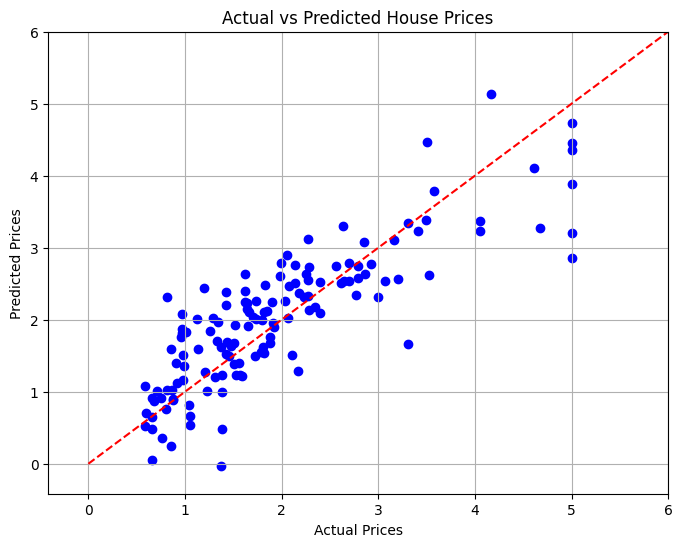

In [8]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Step 2: Loading the Dataset
# Load the California Housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

# Step 3: Randomly Selecting 300 Samples
df_sample = df.sample(n=700, random_state=42)

# Step 4: Exploratory Data Analysis (EDA)
# Overview of the data
print("First five rows of the dataset:")
print(df_sample.head())


# Step 6: Splitting the dataset into Train and Test sets
X = df_sample.drop('PRICE', axis=1)  # Features
y = df_sample['PRICE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Training
# Creating and training the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 8: Evaluating the model
# Making predictions on the test set
y_pred = lr.predict(X_test)

# Calculating Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R^2: {r2}")

# Step 9: Displaying Actual vs Predicted Values
results = pd.DataFrame({'Actual Prices': y_test.values, 'Predicted Prices': y_pred})
print("\nActual vs Predicted:")
print(results)

# Step 10: Visualizing the Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')

# Draw the ideal line
plt.plot([0, 6], [0, 6], color='red', linestyle='--')  # Adjusted for California dataset

# Set limits to minimize empty space
plt.xlim(y_test.min() - 1, y_test.max() + 1)
plt.ylim(y_test.min() - 1, y_test.max() + 1)

plt.grid()
plt.show()
